In [1]:
import geopandas
import numpy
import matplotlib.pyplot as plt
import geoplanar
from shapely.geometry import box, Polygon


##  Planar Enforcement Violation: One polygon overlapping another polygon

<AxesSubplot:>

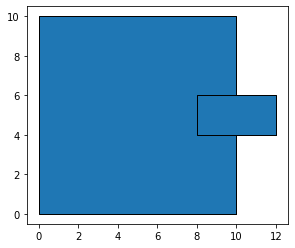

In [2]:
p1 = box(0,0,10,10)
p2 = box(8,4, 12,6)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2])
gdf.plot(edgecolor='k')

In [3]:
geoplanar.is_overlapping(gdf)

True

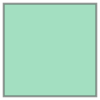

In [4]:
gdf.geometry[0]

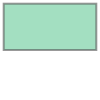

In [5]:
gdf.geometry[1]

In [6]:
gdf = geoplanar.trim_overlaps(gdf)
geoplanar.is_overlapping(gdf)

False

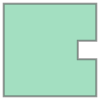

In [7]:
gdf.geometry[0]

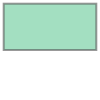

In [8]:
gdf.geometry[1]

In [9]:
gdf.area

0    96.0
1     8.0
dtype: float64

## Default trims the largest of the two overlapping polygons

To have the correction apply the trim to the smaller of the two polygons, set `largest=False`:

<AxesSubplot:>

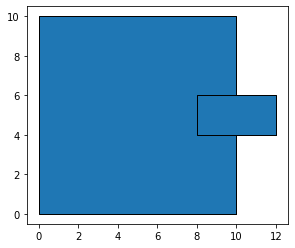

In [10]:
p1 = box(0,0,10,10)
p2 = box(8,4, 12,6)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2])
gdf.plot(edgecolor='k')

<AxesSubplot:>

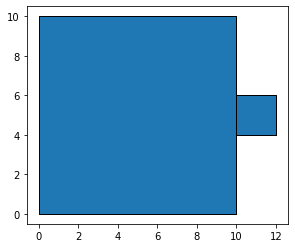

In [11]:
gdf = geoplanar.trim_overlaps(gdf, largest=False)
gdf.plot(edgecolor='k')

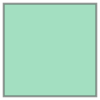

In [12]:
gdf.geometry[0]

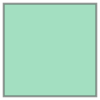

In [13]:
gdf.geometry[1]

In [14]:
gdf.area

0    100.0
1      4.0
dtype: float64

##  Planar Enforcement Violation: One polygon overlapping two

As always, care must be taken when carrying out a planar correction, as the result may not be what is desired:

<AxesSubplot:>

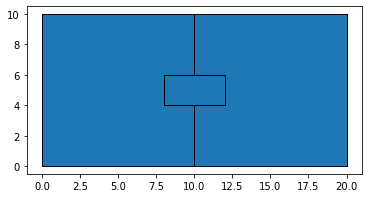

In [15]:
p1 = box(0,0,10,10)
p2 = box(10,0, 20,10)
p3 = box(8,4, 12,6)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2,p3])
gdf.plot(edgecolor='k')

In [16]:
gdf1 = geoplanar.trim_overlaps(gdf, largest=False) # trim the smallest feature of an intersecting pair

In [17]:
gdf1.area

0    100.0
1    100.0
2      0.0
dtype: float64

<AxesSubplot:>

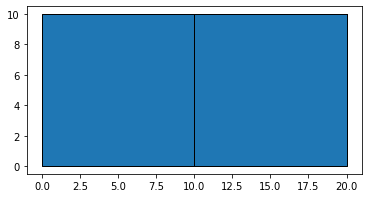

In [18]:
gdf1.plot(edgecolor='k')

In [19]:
p1 = box(0,0,10,10)
p2 = box(10,0, 20,10)
p3 = box(8,4, 12,6)

gdf = geopandas.GeoDataFrame(geometry=[p1,p2,p3])
gdf2 = geoplanar.trim_overlaps(gdf)

In [20]:
gdf2.geometry

0    POLYGON ((0.00000 0.00000, 0.00000 10.00000, 1...
1    POLYGON ((10.00000 4.00000, 12.00000 4.00000, ...
2    POLYGON ((12.00000 4.00000, 12.00000 6.00000, ...
Name: geometry, dtype: geometry

In [21]:
gdf2.area

0    96.0
1    96.0
2     8.0
dtype: float64

<AxesSubplot:>

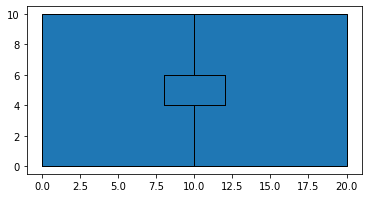

In [22]:
gdf2.plot(edgecolor='k')